In [1]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [2]:
test_start_date = datetime(2012,8,3)
def get_data(df, s, d):
    df= df[(df.Store==s)& (df.Dept==d)]
    df.drop(['Store', 'Dept', 'IsHoliday'], axis=1, inplace= True)
    df['Date']= pd.to_datetime(df.Date)
    df.set_index('Date', inplace=True)
    df = df.asfreq(pd.infer_freq(df.index))
    df_test=df.loc[test_start_date:]
    df_train=df.loc[:test_start_date-timedelta(days=1)]
    return (df_train, df_test, df)

In [25]:
df=pd.read_csv('train.csv')
df_train, df_test, df = get_data(df, 45, 9)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-2-1dca09d1e2b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= pd.to_datetime(df.Date)


In [16]:
df

,Weekly_Sales
Date,
2010-02-05,50605.27
2010-02-12,44682.74
2010-02-19,47928.89
2010-02-26,44292.87
2010-03-05,48397.98
...,...
2012-09-28,45784.76
2012-10-05,48577.08
2012-10-12,42112.67


In [5]:
df_train

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90
...,...
2012-06-29,15722.82
2012-07-06,17823.37
2012-07-13,16566.18


In [6]:
df_test

,Weekly_Sales
Date,
2012-08-03,16628.31
2012-08-10,16119.92
2012-08-17,17330.70
2012-08-24,16286.40
2012-08-31,16680.24
2012-09-07,18322.37
2012-09-14,19616.22
2012-09-21,19251.50
2012-09-28,18947.81


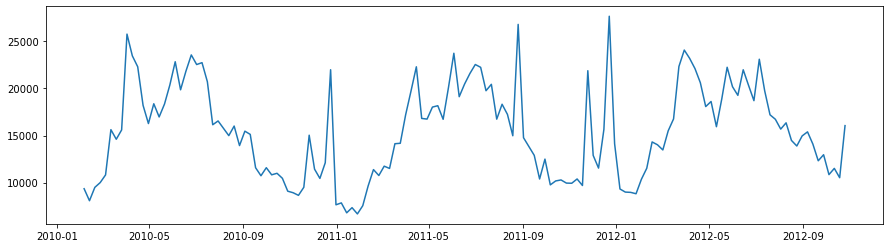

In [26]:
plt.figure(figsize=(15,4))
plt.plot(df)

In [ ]:
 Arima_model=auto_arima(df_train, start_p=2, start_q=2, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=52,d=0, seasonal=True, trace=True,  error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=2496.601, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2592.530, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=2478.524, Time=2.06 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=inf, Time=9.32 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2895.292, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=2495.521, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=2480.310, Time=17.87 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=2478.402, Time=5.49 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=inf, Time=9.16 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : AIC=inf, Time=35.69 sec
 ARIMA(1,0,0)(1,0,2)[52] intercept   : AIC=2478.245, Time=27.56 sec
 ARIMA(1,0,0)(0,0,2)[52] intercept   : AIC=inf, Time=91.45 sec
 ARIMA(1,0,0)(2,0,2)[52] intercept   : AIC=inf, Time=128.75 sec
 ARIMA(1,0,0)(1,0,3)[52] intercept   : AIC=2479.668, Time=72.31 sec
 ARIMA(1,0,0)(0,0,3)[52] intercept   

In [ ]:
Arima_model.summary()

In [20]:
model_fit = Arima_model.fit(df_train)

In [21]:
forecast = model_fit.predict(n_periods=len(df_test))
forecast = pd.DataFrame(forecast,index = df_test.index,columns=['Prediction'])

In [22]:
residuals= pd.concat([df_test, forecast], axis=1)

In [23]:
residuals['error']= residuals['Weekly_Sales']-residuals['Prediction']
residuals.drop(['Weekly_Sales', 'Prediction'], axis=1, inplace=True)

In [ ]:
residuals

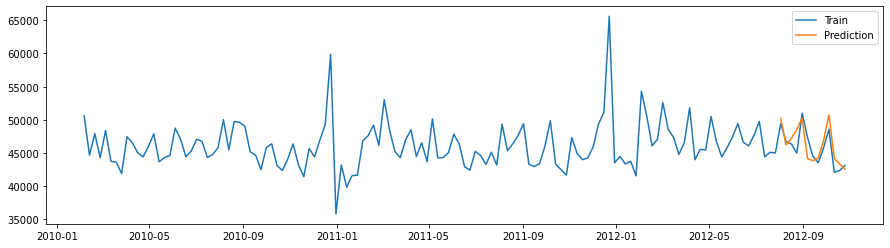

In [24]:
plt.figure(figsize=(15,4))
plt.plot(df, label='Train')
#plt.plot(df_test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend()

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

In [ ]:
df_train

In [ ]:
rolling_forecast=df_test.copy()
rolling_forecast["Prediction"]= np.nan

In [ ]:
rolling_forecast

In [ ]:
for train_end in df_test.index:
    df_train_rolling= df[:train_end-timedelta(days=7)]
    model = Arima_model.fit(df_train_rolling)
    pred = model.predict(n_periods=1)
    rolling_forecast['Prediction'][train_end] = pred

In [ ]:
rolling_forecast

In [ ]:
rolling_forecast.drop('Weekly_Sales', axis=1, inplace=True)

In [ ]:
rolling_residuals= rolling_forecast.copy()

In [ ]:
rolling_residuals['error']=rolling_residuals.Weekly_Sales - rolling_residuals.Prediction
rolling_residuals.drop(['Weekly_Sales', 'Prediction'], axis=1, inplace=True)

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(df, label='Train')
#plt.plot(df_test, label='Valid')
plt.plot(rolling_forecast, label='Prediction')
plt.legend()

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

In [ ]:
#Without Rolling forecast
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals.error/df_test.Weekly_Sales)),4))

In [ ]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals.error/df_test.Weekly_Sales)),4))